# Model Building and Test the Data
### Loading the Dataset & Image Data Generation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

In [3]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'C:\Users\sujit\Desktop\PROJECT\DATA_COLLECTION\training_set',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'C:\Users\sujit\Desktop\PROJECT\DATA_COLLECTION\test_set',target_size=(64,64), class_mode='categorical',batch_size=900)

Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [4]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  18
Len x-test :  3


In [5]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [6]:
# The Class Indices in Testing Dataset
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

### Model Building

In [7]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [8]:
# Creating Model
model=Sequential()

In [9]:
# Adding Layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Adding Hidden Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Adding Output Layer
model.add(Dense(9,activation='softmax'))

In [10]:
# Compiling the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\sujit\AppData\Local\Temp\ipykernel_6736\1042518445.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
18/18 [==============================] - 795s 44s/step - loss: 1.0497 - accuracy: 0.6495 - val_loss: 0.3698 - val_accuracy: 0.9107
Epoch 2/10
18/18 [==============================] - 813s 45s/step - loss: 0.2158 - accuracy: 0.9373 - val_loss: 0.2620 - val_accuracy: 0.9378
Epoch 3/10
18/18 [==============================] - 314s 18s/step - loss: 0.0918 - accuracy: 0.9761 - val_loss: 0.1756 - val_accuracy: 0.9618
Epoch 4/10
18/18 [==============================] - 182s 10s/step - loss: 0.0492 - accuracy: 0.9869 - val_loss: 0.1714 - val_accuracy: 0.9738
Epoch 5/10
18/18 [==============================] - 166s 9s/step - loss: 0.0326 - accuracy: 0.9911 - val_loss: 0.1794 - val_accuracy: 0.9760
Epoch 6/10
18/18 [==============================] - 170s 9s/step - loss: 0.0227 - accuracy: 0.9943 - val_loss: 0.1970 - val_accuracy: 0.9764
Epoch 7/10
18/18 [==============================] - 163s 9s/step - loss: 0.0150 - accuracy: 0.9967 - val_loss: 0.2063 - val_accuracy: 0.9778
Epoch 8/1

### Save the Model

In [12]:
model.save('asl_model_84_54.h5')

### Test the Model

In [13]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [14]:
model=load_model('asl_model_84_54.h5')
img=image.load_img(r'C:\Users\sujit\Desktop\PROJECT\DATA_COLLECTION\test_set\D\2.png',
                   target_size=(64,64))

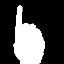

In [15]:
img

In [16]:
x=image.img_to_array(img)

In [17]:
x.ndim

3

In [18]:
x=np.expand_dims(x,axis=0)

In [19]:
x.ndim

4

In [20]:
pred=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 9s 9s/step


In [21]:
pred

array([3], dtype=int64)

In [22]:
index=['A','B','C','D','E','F','G','H','I']
print(index[pred[0]])

D
